In [9]:
import sys
sys.path.append('/Users/tong/soundscape_IR/soundscape_viewer')
import numpy as np 
import pandas as pd
import pickle, glob
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.dates as mdates
from soundscape_viewer import lts_viewer
from soundscape_viewer import data_organize, matrix_operation
from utility import matrix_operation

def to_datetime(date):
    timestamp = ((date - np.datetime64('1970-01-01T00:00:00'))
                 / np.timedelta64(1, 's'))
    return datetime.utcfromtimestamp(timestamp)


In [3]:
year = 2022
place = 'Taoyuan'
path = glob.glob(f'../Results/soundsepration/{place}-5min/202?*_{year}_3stage_separation/')[0]


In [7]:
def readtide(path, begintime=t1, endtime=t2):
    def get_strtime(time):
        time = to_datetime(time)
        yyyy = str(time.year)
        mm   = str(time.month).zfill(2)
        dd   = str(time.day).zfill(2)
        hh   = str(time.hour).zfill(2)
        return f'{yyyy}{mm}{dd}{hh}'
    

    dtide_ori = pd.read_csv(path, skiprows=20)
    begin = get_strtime(begintime); end = get_strtime(endtime)
    dtide_ori = dtide_ori[dtide_ori['yyyymmddhh'] >= int(begin)][dtide_ori['yyyymmddhh'] <= int(end)]
    tide = {'time':[], 'height':[], 'diff':[]}
    
    for time in dtide_ori['yyyymmddhh']:
        timestr = str(time)
        yyyy = int(timestr[:4])
        mm  = int(timestr[4:6])
        dd = int(timestr[6:8])
        hh = int(timestr[8:10])
        dtide_temp = dtide_ori[dtide_ori['yyyymmddhh']==time]
        for minn_str in [':00', ':06', ':12', ':18', ':24', ':30', ':36', ':42', ':48', ':54']:
            tideheight = dtide_temp[minn_str].values[0]
            minn = int(minn_str.rsplit(':')[-1])
            tide['time'].append(datetime(yyyy,mm,dd,hh,minn))
            tide['height'].append(tideheight)

    for j in range(len(tide['height'])):
        if j+1 != len(tide['height']):
            h1 = tide['height'][j]
            h2 = tide['height'][j+1]

            diff = (h2 - h1)/(6*60)
            tide['diff'].append(diff)
        else:
            tide['diff'].append(np.nan)
    df = pd.DataFrame(tide)
    return df 


def nan_argsort(matrix):
    temp = matrix.copy()
    temp[np.isnan(matrix)] = np.inf
    return temp.argsort()
def sort_df(df_time):
    df_time = df_time.reset_index(drop=True)
    index_vel = np.where(abs(df_time['diff'])<=0.05)[0] #0.075
    df_time = df_time[df_time.index.isin(index_vel)]
    df_clear = df_time.reset_index(drop=True)

    sorted_height = df_clear['height'][nan_argsort(df_clear['height'])]
    sorted_height_nonan = sorted_height[~np.isnan(sorted_height)]
    return df_clear, sorted_height_nonan

NameError: name 't1' is not defined

In [6]:
sunpath = f'../DataBase/Data_CWA/sunset_time_taoyuan{year}.csv'
dsun = pd.read_csv(sunpath)
delta_day = to_datetime(t2)- to_datetime(t1)
sun_df = {'time':[], 'sunrise': [], 'sunset':[]}

for idx in range(0, delta_day.days+1,2):
    current_day = to_datetime(t1)+timedelta(days=idx)
    year = current_day.year
    month = current_day.month
    day = current_day.day

    sunset_hr = int((dsun['SUNSET'][dsun['TIME']==f'{year}/{month}/{day}'].values[0]).rsplit(':')[0])
    sunset_min = int((dsun['SUNSET'][dsun['TIME']==f'{year}/{month}/{day}'].values[0]).rsplit(':')[-1])
    sunrise_hr = int((dsun['SUNRSET'][dsun['TIME']==f'{year}/{month}/{day}'].values[0]).rsplit(':')[0])
    sunrise_min = int((dsun['SUNRSET'][dsun['TIME']==f'{year}/{month}/{day}'].values[0]).rsplit(':')[-1])  
    
    sun_df['time'].append(datetime(year, month, day))
    sun_df['sunrise'].append(sunrise_hr+(sunrise_min/60))
    sun_df['sunset'].append(sunset_hr+(sunset_min/60))

NameError: name 'to_datetime' is not defined

In [8]:
dtide = readtide(f'../DataBase/Data_CWA/{year}_1116_竹圍_tide.csv', begintime=t1, endtime=t2)
# dtide = readtide(f'../DataBase/Data_CWA/{year}_12191_長潭里_tide.csv', begintime=t1, endtime=t2)
tide_df = {'time':[], 'max': [], 'min':[]}
for dd in range(1, days):
    t = to_datetime(t1) + timedelta(days=dd)
    year = t.year
    month = t.month
    day = t.day
    
    for hr in [0, 12]:
        dtide_ = dtide[dtide['time']>=datetime(year, month, day, hr, 0)][dtide['time']<=datetime(year, month, day, hr+11, 59)]  
        df_clear, sorted_height_nonan = sort_df(dtide_)
        try:
            min_h_time = [df_clear['time'][i] for i in sorted_height_nonan[:1].index][0]
            max_h_time = [df_clear['time'][i] for i in sorted_height_nonan[-1:].index][0]
            tide_df['time'].append(datetime(year, month, day))
            tide_df['max'].append(max_h_time.hour+max_h_time.minute/60)
            tide_df['min'].append(min_h_time.hour+min_h_time.minute/60)
        
        except:
            pass

NameError: name 'readtide' is not defined

/Volumes/home-1/DataBase/PAM_pickle/2023/
['/Volumes/home-1/DataBase/PAM_pickle/2023/Taoyuan_041411-050116-5min.pkl', '/Volumes/home-1/DataBase/PAM_pickle/2023/Taoyuan_060808-062321-5min.pkl', '/Volumes/home-1/DataBase/PAM_pickle/2023/Taoyuan_081811-090222-5min.pkl', '/Volumes/home-1/DataBase/PAM_pickle/2023/Taoyuan_120812-122615-5min.pkl']
Loading file: /Volumes/home-1/DataBase/PAM_pickle/2023/Taoyuan_041411-050116-5min.pkl
(4953, 512)
Loading file: /Volumes/home-1/DataBase/PAM_pickle/2023/Taoyuan_060808-062321-5min.pkl
(4488, 512)
Loading file: /Volumes/home-1/DataBase/PAM_pickle/2023/Taoyuan_081811-090222-5min.pkl
(4464, 512)
Loading file: /Volumes/home-1/DataBase/PAM_pickle/2023/Taoyuan_120812-122615-5min.pkl
(5232, 512)
(19137, 511)
(73783, 2)
256
(257, 288)


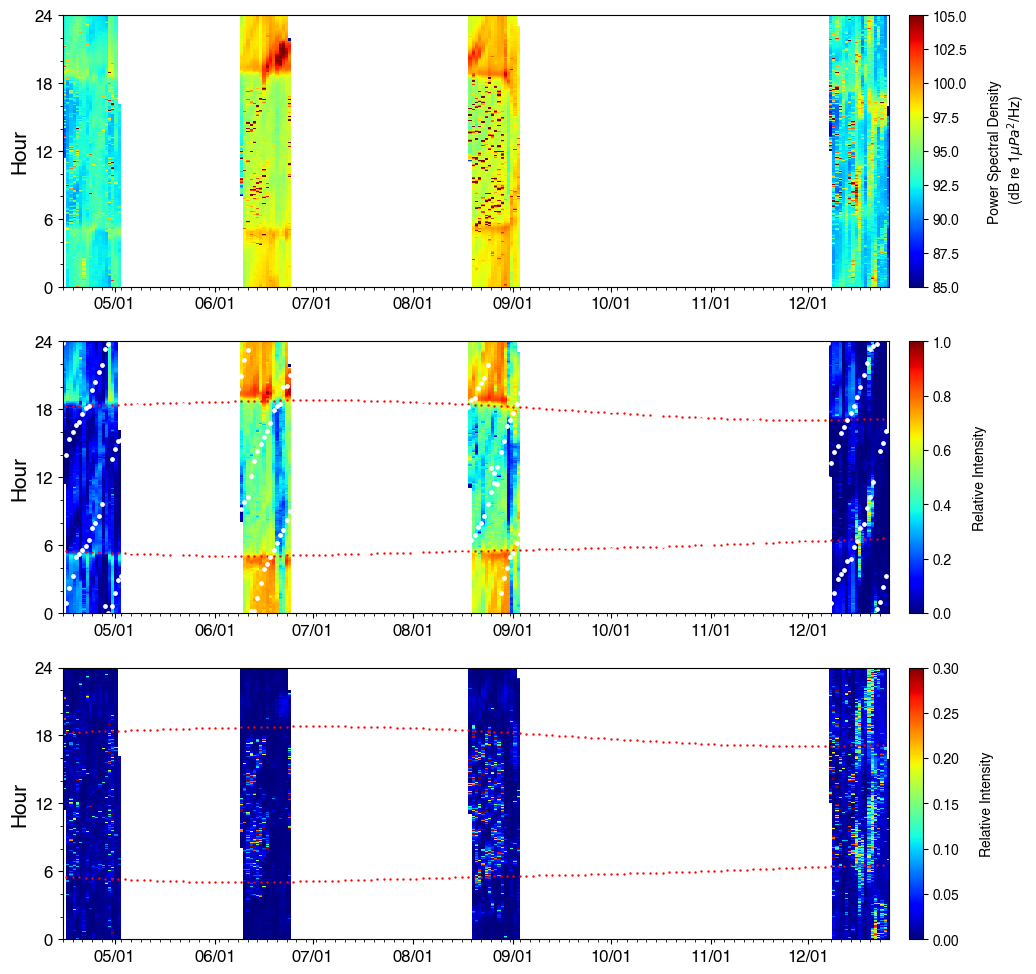

In [14]:
# path = glob.glob(f'../Results/soundsepration/{place}-5min/202?*_{year}_4stage_separation/')[0]
df = pd.read_pickle(glob.glob(f"{path}/{place}_{year}_diurnal_variations_nostd_{year}??_S1.pkl")[0])  
days, hr = df['level'].shape

fig, ax = plt.subplots(3, 1, figsize=(days/20, 12))
axis = plt.gca()
plt.rcParams["font.family"] = "Helvetica"
hr_boundary = [0, 24]

dtime = pd.read_csv(f"{path}/{place}_{year}_index_variations.csv")
dtime = pd.to_datetime(dtime['Time'][~dtime['H'].isna()])
t1 = dtime.values[0]; t2 = dtime.values[-1]

plot_matrix_all = read_all_energy(place, year)
im1 = ax[0].imshow(plot_matrix_all.T, vmin=85, vmax=105, 
            origin='lower', aspect='auto', cmap=cm.jet, interpolation='none',
            extent=[t1, t2, np.min(hr_boundary), np.max(hr_boundary)])
ax[0].set_xlim(to_datetime(t1), to_datetime(t2))
divider = make_axes_locatable(axis)

ax[0].xaxis_date()
ax[0].set_ylabel('Hour', fontsize=15)
ax[0].yaxis.set_minor_locator(MultipleLocator(2))
ax[0].yaxis.set_major_locator(MultipleLocator(6))
ax[0].xaxis.set_minor_locator(mdates.DayLocator(interval=3))
ax[0].xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
ax[0].tick_params(axis='both', which='major', labelsize=12)
cbar1 = plt.colorbar(im1, pad=0.02)  
cbar1.ax.get_yaxis().labelpad = 15
cbar1.set_label('Power Spectral Density\n (dB re 1'r'$\mu Pa^2$/Hz)')
#================

im1 = ax[1].imshow(df['level'].T, vmin=(np.nanmin(df['level'])), vmax=(np.nanmax(df['level'])), 
            origin='lower', aspect='auto', cmap=cm.jet, interpolation='none',
            extent=[t1, t2, np.min(hr_boundary), np.max(hr_boundary)])

ax[1].scatter(sun_df['time'], sun_df['sunrise'],color='red',marker="o", s=0.5)  # <- MOVE HERE
ax[1].scatter(sun_df['time'], sun_df['sunset'],color='red',marker="o", s=0.5)

ax[1].scatter(tide_df['time'], tide_df['min'],color='white',marker="o", s=6)  # <- MOVE HERE
# ax[0].scatter(tide_df['time'], tide_df['max'],color='white',marker="^", s=5)

ax[1].set_xlim(to_datetime(t1), to_datetime(t2))
divider = make_axes_locatable(axis)

ax[1].xaxis_date()
ax[1].set_ylabel('Hour', fontsize=15)
ax[1].yaxis.set_minor_locator(MultipleLocator(2))
ax[1].yaxis.set_major_locator(MultipleLocator(6))
ax[1].xaxis.set_minor_locator(mdates.DayLocator(interval=3))
ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
ax[1].tick_params(axis='both', which='major', labelsize=12)
cbar1 = plt.colorbar(im1,pad=0.02)  
cbar1.ax.get_yaxis().labelpad = 15
cbar1.set_label('Relative Intensity')

#===============
path = glob.glob(f'../Results/soundsepration/{place}-5min/202?*_{year}_3stage_separation/')[0]
df = pd.read_pickle(glob.glob(f"{path}/{place}_{year}_diurnal_variations_nostd_{year}??_S0.pkl")[0])  
days, hr = df['level'].shape

dtime = pd.read_csv(f"{path}/{place}_{year}_index_variations.csv")
dtime = pd.to_datetime(dtime['Time'][~dtime['H'].isna()])
t1 = dtime.values[0]; t2 = dtime.values[-1]
im1 = ax[2].imshow(df['level'].T, vmin=(np.nanmin(df['level'])), vmax=0.3, #(np.nanmax(df['level'])), 
            origin='lower', aspect='auto', cmap=cm.jet, interpolation='none',
            extent=[t1, t2, np.min(hr_boundary), np.max(hr_boundary)])

ax[2].scatter(sun_df['time'], sun_df['sunrise'],color='red',marker="o", s=0.5)  # <- MOVE HERE
ax[2].scatter(sun_df['time'], sun_df['sunset'],color='red',marker="o", s=0.5)

# ax[2].scatter(tide_df['time'], tide_df['min'],color='white',marker="v", s=10, edgecolors='k', lw=0.3)  # <- MOVE HERE
# ax[0].scatter(tide_df['time'], tide_df['max'],color='white',marker="^", s=5)

ax[2].set_xlim(to_datetime(t1), to_datetime(t2))
divider = make_axes_locatable(axis)

ax[2].xaxis_date()
ax[2].set_ylabel('Hour', fontsize=15)
ax[2].yaxis.set_minor_locator(MultipleLocator(2))
ax[2].yaxis.set_major_locator(MultipleLocator(6))
ax[2].xaxis.set_minor_locator(mdates.DayLocator(interval=3))
ax[2].xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
ax[2].tick_params(axis='both', which='major', labelsize=12)
cbar1 = plt.colorbar(im1, pad=0.02)  
cbar1.ax.get_yaxis().labelpad = 15
cbar1.set_label('Relative Intensity')

savefig = '/Users/tong/Documents/09_IONTU/ForCF/海保署報告/Figure'
plt.savefig(f'{savefig}/{place}_{year}_diurnal_variations_all.png', dpi=200)
plt.savefig(f'{savefig}/{place}_{year}_diurnal_variations_all.pdf', dpi=200)

In [4]:
def read_all_energy(place, year):

    LTS=lts_viewer(path=f'/Volumes/home-1/DataBase/PAM_pickle/{year}/', place=place)
    input_data, f, time = LTS.input_selection('median', f_range=[100,48000])#

    if f.shape[0] == 510:
        modified_f = []

        for i in range(int(f.shape[0]/2)):
            ii = 2*i+1
            modified_f.append(f[ii])
        modified_f = np.array(modified_f)

        modified_input_data = np.zeros([input_data.shape[0], int(f.shape[0]/2)])
        for j in range(input_data.shape[0]):
            for i in  range(int(f.shape[0]/2)):
                modified_input_data[j,i] = input_data[j,2*i+1]

        if modified_f.shape[0] == 255 and modified_input_data.shape[1] == 255:
            f = modified_f
            input_data = modified_input_data
            clear_model_W = True 
            print()
            print('downsampling frequency ')
            print(input_data.shape)
            print()

    if time.shape[0] > input_data.shape[0]:
        print('time problem')
        time = time[1:]

    # matrix_operation().plot_lts(input_data, f, time, vmin=40, vmax=90, fig_width=20, fig_height=3, lts=False)

    ori_sum_db = 10*np.log10((10**(input_data.T/10)).sum(axis=0))
    save_result = matrix_operation().gap_fill(time_vec=time, data=ori_sum_db)
    print(save_result.shape)

    timevec = save_result[:,0]
    t2 = datetime.fromtimestamp(timevec[-1])
    t1 = datetime.fromtimestamp(timevec[0])
    data = save_result[:,1]
    delta = t2 - t1

    days, hours, minutes = delta.days, delta.total_seconds() // 3600, delta.total_seconds() // 60 % 60
    day_, day__ = divmod(hours, 24)
    try:
        if day__ >= 12:
            print('adding 1 day')
            days+=1
        print(days)

        hr = 2*int(hours)

        plot_matrix_level= np.full((days+1,288), np.nan) #48
        beginhour = t1.hour
        beginmin  = t1.minute
        #========= 
        #========= for time resolution = 5 min 
        #=========

        for dd in range(days+1):
            if dd == 0:
                beginidx = int(beginhour*12+(beginmin/5))
                plot_matrix_level[dd, beginidx:] = data[:(288-beginidx)]
                ori_index = 288-beginidx
            elif dd == days:
                last_hour = len(data[ori_index:])
                plot_matrix_level[dd, :last_hour] = data[ori_index:]
            else:
                plot_matrix_level[dd,:] = data[ori_index:ori_index+288]
                ori_index+=288
    except:
        if day__ >= 11:
            print('adding 1 day')
            days+=1
        print(days)

        hr = 2*int(hours)

        plot_matrix_level= np.full((days+1,288), np.nan) #48
        beginhour = t1.hour
        beginmin  = t1.minute
        #========= 
        #========= for time resolution = 5 min 
        #=========

        for dd in range(days+1):
            if dd == 0:
                beginidx = int(beginhour*12+(beginmin/5))
                plot_matrix_level[dd, beginidx:] = data[:(288-beginidx)]
                ori_index = 288-beginidx
            elif dd == days:
                last_hour = len(data[ori_index:])
                plot_matrix_level[dd, :last_hour] = data[ori_index:]
            else:
                plot_matrix_level[dd,:] = data[ori_index:ori_index+288]
                ori_index+=288  
    print(plot_matrix_level.shape)
    return plot_matrix_level